In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('nipy_spectral')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pydataset as data

from acquire import get_telco_data
from prepare import clean_telco_data, prep_telco_data

from env import get_db_url

α = .05

In [2]:
telco_df = get_telco_data()

In [3]:
telco_df.columns.tolist()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type_id.1',
 'contract_type',
 'payment_type_id.1',
 'payment_type',
 'internet_service_type_id.1',
 'internet_service_type']

In [4]:
#train.total_charges = train.total_charges.astype('float')
#train.dtypes

In [5]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,2,65.60,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.90,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,73.90,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,98.00,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,2,83.90,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,2,55.15,742.9,No,2,One year,2,Mailed check,1,DSL
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,1,85.10,1873.7,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,2,50.30,92.75,No,1,Month-to-month,2,Mailed check,1,DSL
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,2,67.85,4627.65,No,3,Two year,2,Mailed check,1,DSL


In [6]:
train, validate, test = prep_telco_data(telco_df)
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
3270,4673-KKSLS,Female,No,No,No,31,Yes,No,Yes,No,...,0,0,0,0,0,0,1,0,1,0
6084,8623-ULFNQ,Female,Yes,No,No,26,Yes,Yes,No,No,...,0,1,1,0,0,0,1,0,0,0
4470,6303-KFWSL,Female,No,No,No,29,Yes,Yes,No,Yes,...,0,0,1,1,0,0,1,0,0,0
428,0623-IIHUG,Female,Yes,No,No,21,No,No phone service,Yes,No,...,0,0,1,0,0,0,1,0,0,0
3329,4742-DRORA,Male,No,Yes,Yes,60,Yes,Yes,Yes,No,...,0,0,1,1,0,0,0,0,1,0


# Preliminary Notes:
- There were 11 customers that had no values in 'total_charges,' indicating that they had not been with the company long enough to be charged. This also means that they have not been a customer long enough to have churned, so these rows have been dropped. 

In [7]:
# Key Takeaways:


# Univariate Exploration:

In [8]:
train.dtypes

customer_id                               object
gender                                    object
senior_citizen                            object
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
churn                                     object
contract_type_id.1                         int64
contract_type                             object
payment_type_id.1   

In [9]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'payment_type_id.1', 'payment_type', 'internet_service_type_id.1',
       'internet_service_type', 'gender_Male', 'senior_citizen_Yes',
       'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet 

## Number Churned:

<AxesSubplot:title={'center':'A Large Number of Customers Churned'}, xlabel='churn', ylabel='Count'>

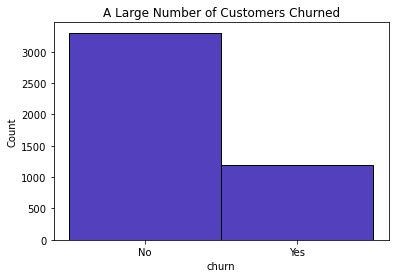

In [10]:
plt.title("A Large Number of Customers Churned")
sns.histplot(train, x = 'churn', legend = True)

In [11]:
# Percentage that Churned:

(train[train.churn == 'Yes'].count().churn / train.churn.shape[0]) * 100

#26.58% of customer churned this month.

26.57777777777778

## Customer Count by Gender:

<AxesSubplot:title={'center':'Gender Appears to be Fairly Evenly Distributed'}, xlabel='gender', ylabel='Count'>

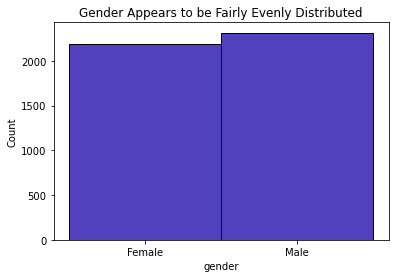

In [12]:
plt.title("Gender Appears to be Fairly Evenly Distributed")
sns.histplot(train, x = 'gender', legend = True)

In [13]:
train.gender.value_counts()

#There are slightly more males than females.

Male      2315
Female    2185
Name: gender, dtype: int64

## Customer Count of Senior Citizens

<AxesSubplot:title={'center':'It Appears Senior Citizens Are a Small Portion of Customer Base'}, xlabel='senior_citizen', ylabel='Count'>

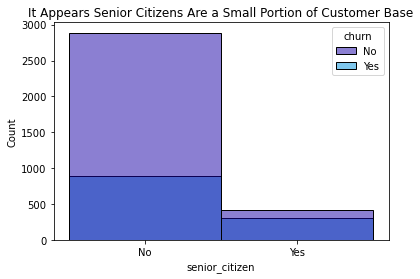

In [14]:
plt.title("It Appears Senior Citizens Are a Small Portion of Customer Base")
sns.histplot(train, x = 'senior_citizen', hue = 'churn', legend = True)

<AxesSubplot:xlabel='senior_citizen', ylabel='Count'>

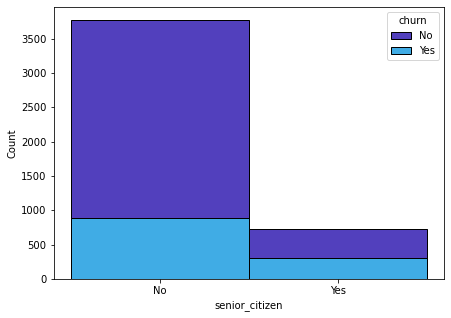

In [15]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data= train, ax=ax, stat="count", multiple="stack",
             x="senior_citizen", kde=False, hue="churn",
             element="bars", legend=True)

#look into making the colors of 'no' something like gray
#make the 'yes' something like red (bad, generally) to stand out

In [16]:
train.senior_citizen.value_counts()

No     3771
Yes     729
Name: senior_citizen, dtype: int64

In [17]:
(train[train.senior_citizen == 1].shape[0] / train.senior_citizen.shape[0]) * 100
#16.2% of customers are senior citizens.

0.0

## Rather than type them all out individually as above, I can script the graphing of all these variables with churn (and do a sort of hybrid bivariate and univariate analysis):
- I can use the below to look for different shapes between the two sides, and shows which *categorical* variables *may* have some relationship with target variable
- I will have to do statistical analysis to determine level of significance

### Takeaways:
- Things to look at:
    - Senior Citizens? - This relationship seems iffy
    - Partnered
    - Dependents? - This relationship doesn't *appear* as strong as whether someone is partnered
    - Multiple lines - Appears multi-line accounts are less likely to churn
    - Add-ons seem like a major predictor (however, I want to be sure I'm not assigning causal relationship where there is only correlation. Could these and churn be driven by some other shared cause e.g. contract type?)
        - online_security: those who don't have it are MUCH more likely to churn, despite it being less common to have it
        - online_backup: those who don't have it are more likely to churn, despite it being less common to have it
        - device_protection: those who do not have it are much more likely to churn, despite it being less common to have it. 
        - tech_support: those who do not have it are much more likely to churn, despite it being less common to have it. 
        - streaming_tv: There may be something here, but I do want to check the degree to which it impacts churn
        - streaming_movies: seems similar to TV, so I need to check this, too. 
    - paperless_billing: there seems to be a relationship.
        - Is there a contract type that typically goes paperless? Is this a driver, or tied to another shared cause?
    - contract_type: this is a MAJOR predictor of churn. Monthly churn is incredibly high, while 1 and 2 year are naturally MUCH lower (they have 1/12 or 1/24 chance of being able to churn here - doesn't necessarily imply they're happier.)
    - payment_type: customers who pay by electronic check are MUCH more likely to churn than those with other methods (again, I want to be sure these aren't both symptoms of the same cause, rather than assigning a direct causal relationship between payment type and churn, just to be sure.)
    - internet_service_type: Those who churn are much more likely to have had fiber optic service. 
    
#### Adam made the point that I would likely need some more detailed, multivariate analysis to control for things above (like multi-line accounts)

<Figure size 432x288 with 0 Axes>

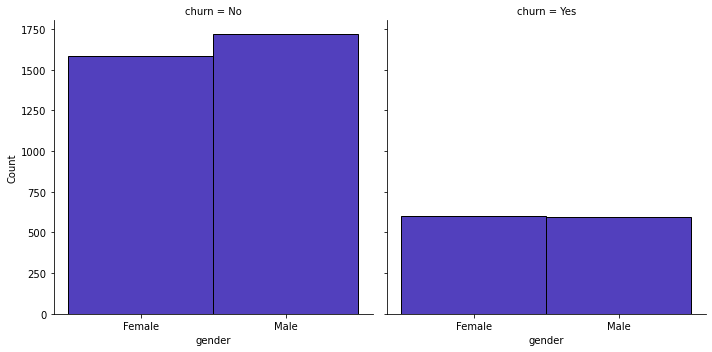

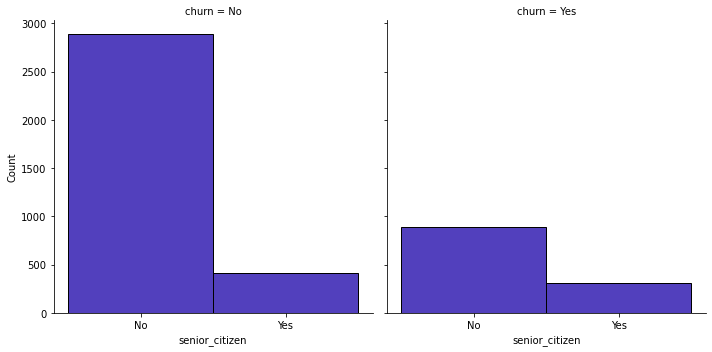

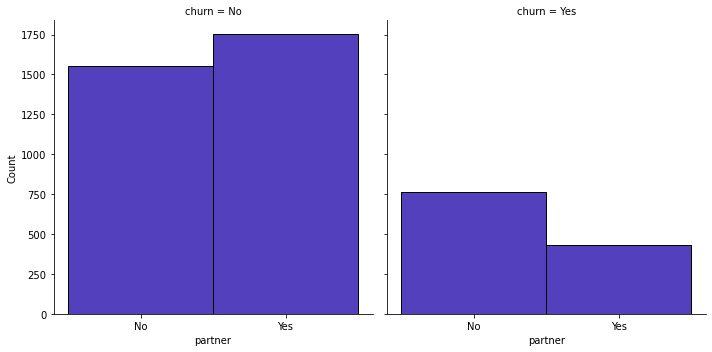

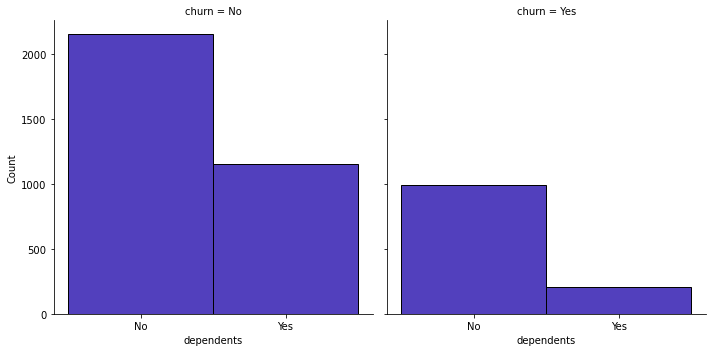

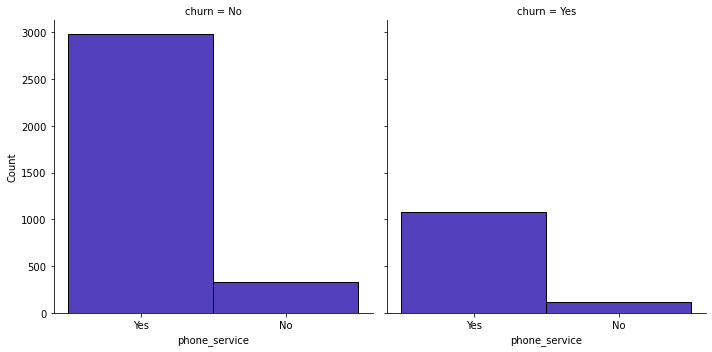

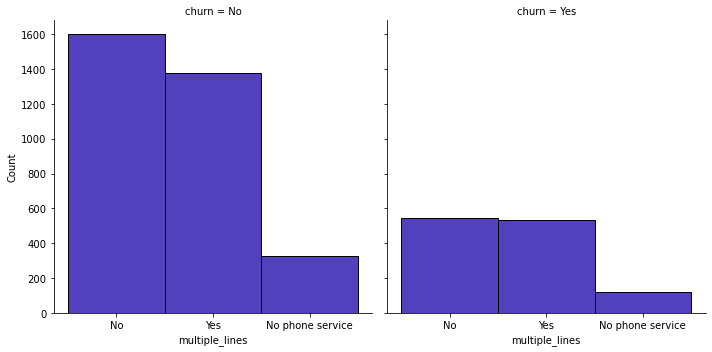

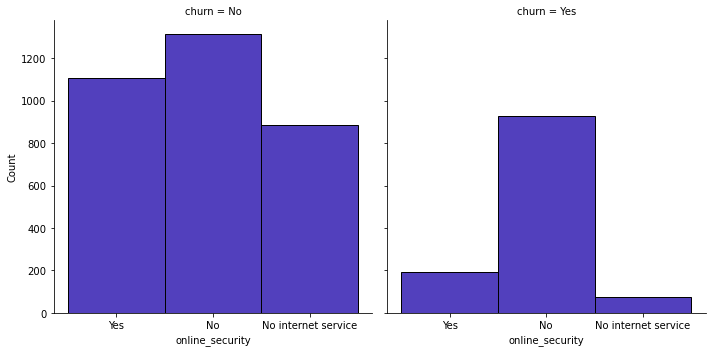

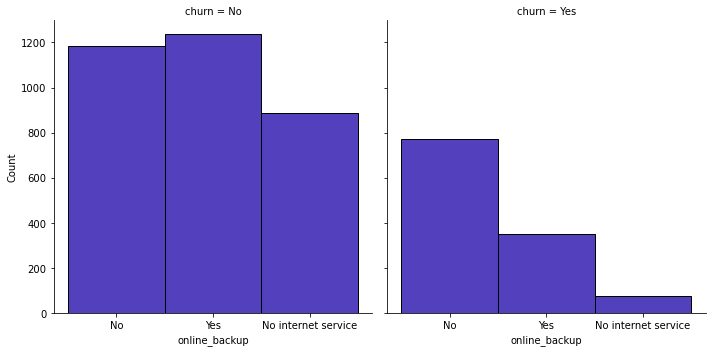

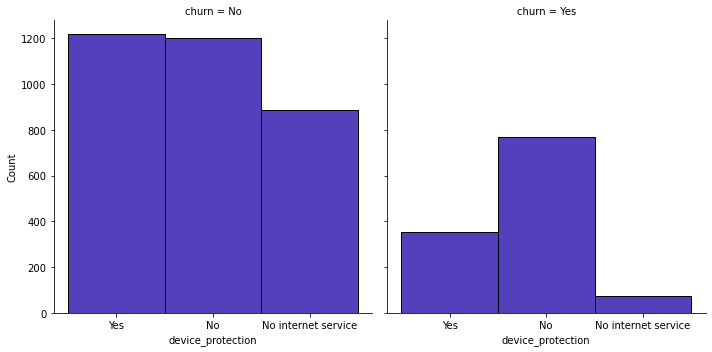

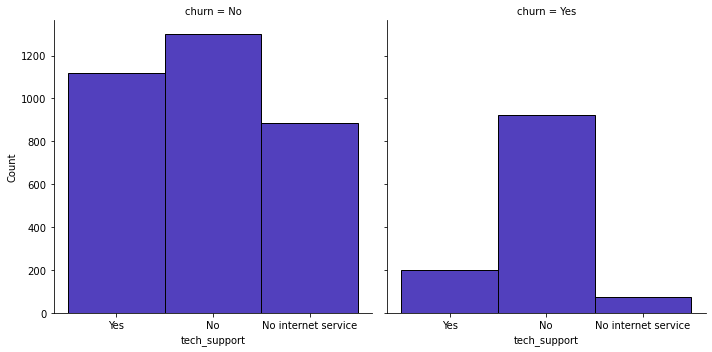

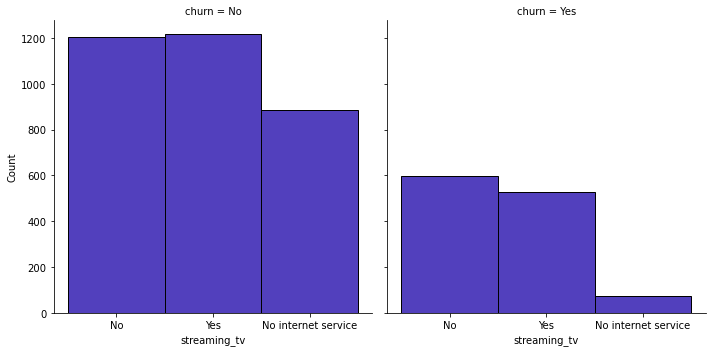

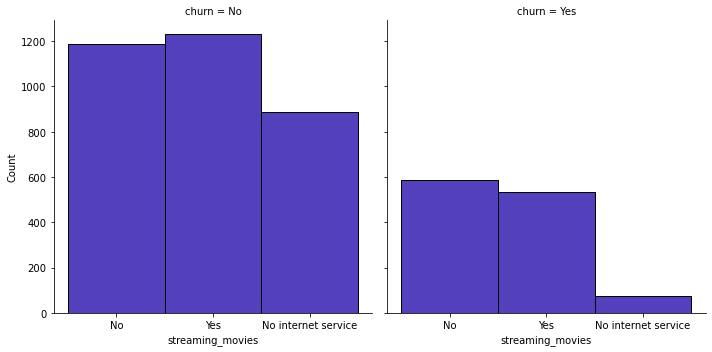

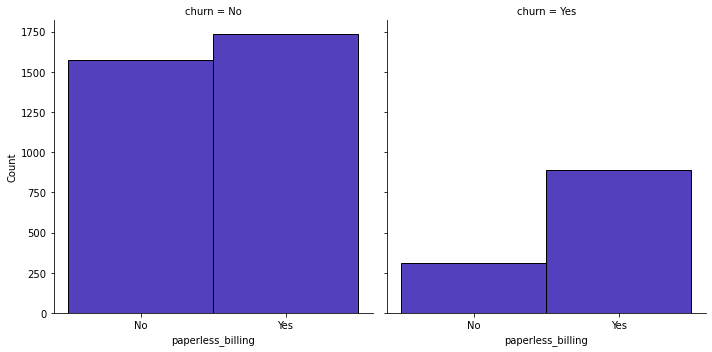

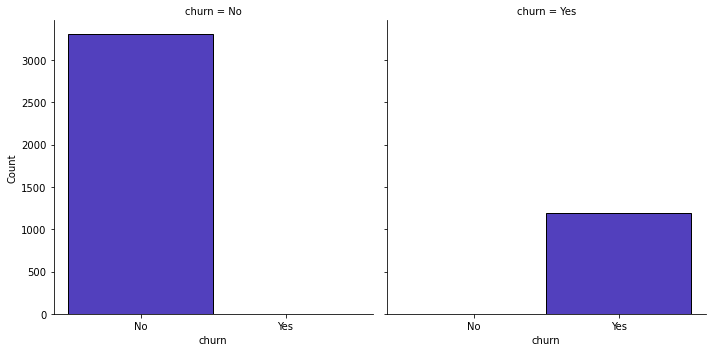

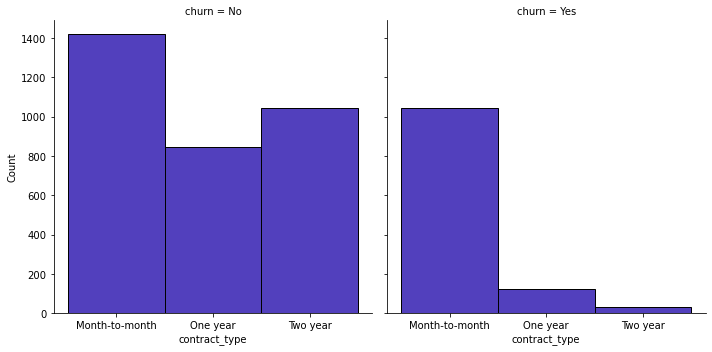

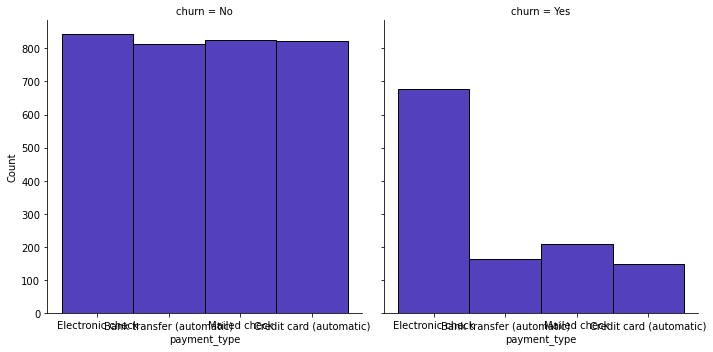

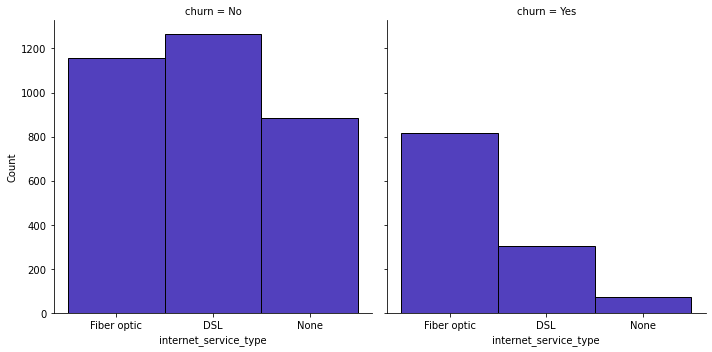

In [18]:
for i, col in enumerate(train.select_dtypes('object').drop(columns = 'customer_id')):
    plt.figure(i)
    sns.displot(x = train[col], col = train.churn)

tenure


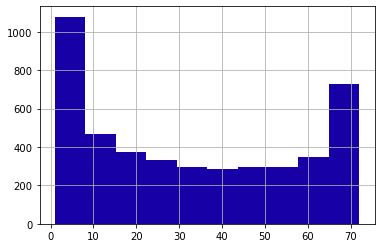

monthly_charges


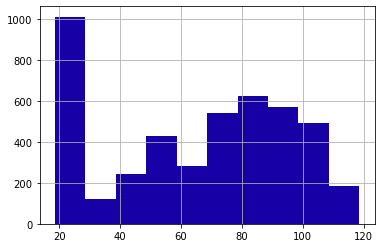

total_charges


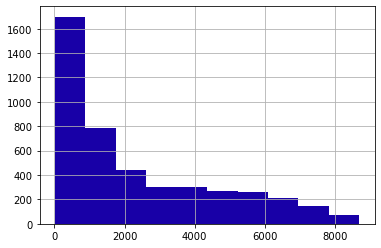

contract_type_id.1


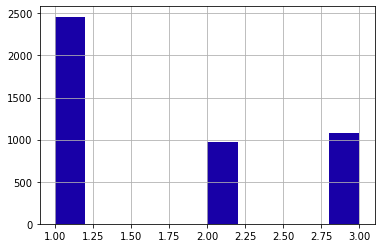

payment_type_id.1


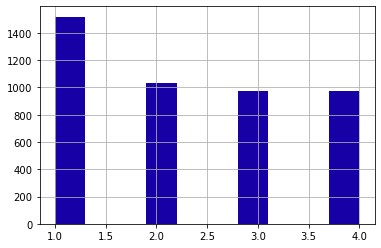

internet_service_type_id.1


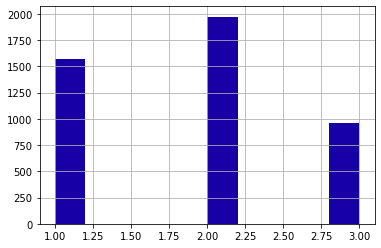

gender_Male


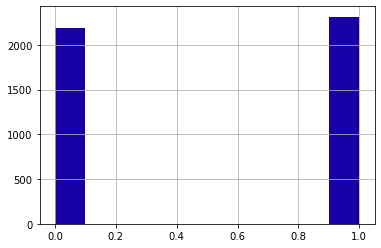

senior_citizen_Yes


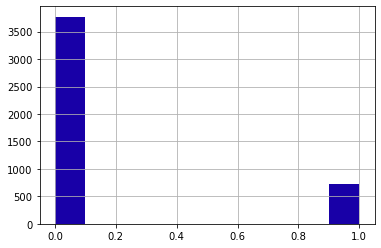

partner_Yes


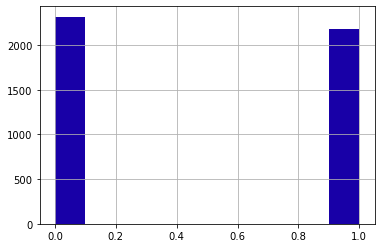

dependents_Yes


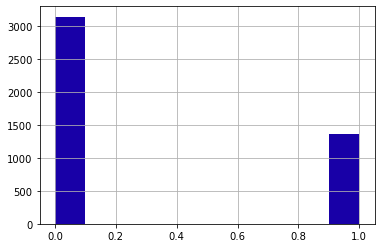

phone_service_Yes


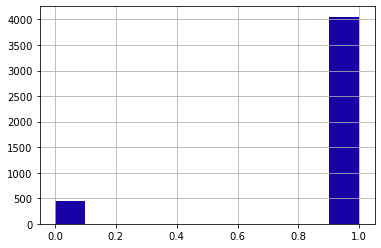

multiple_lines_No phone service


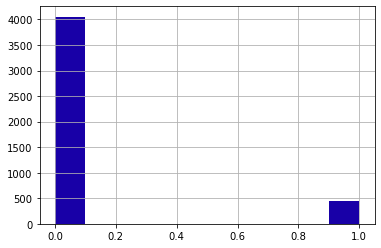

multiple_lines_Yes


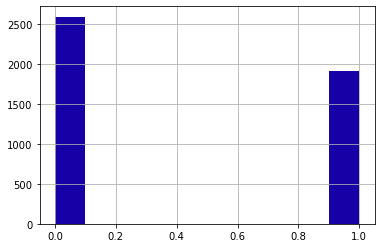

online_security_No internet service


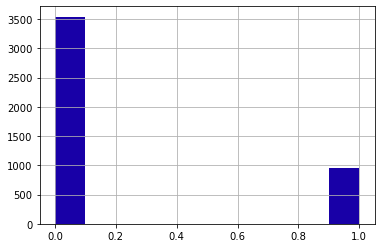

online_security_Yes


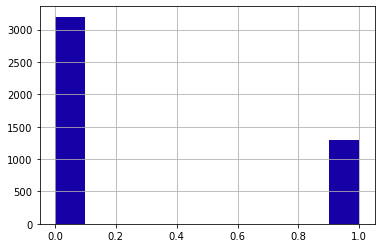

online_backup_No internet service


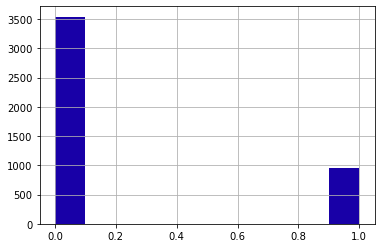

online_backup_Yes


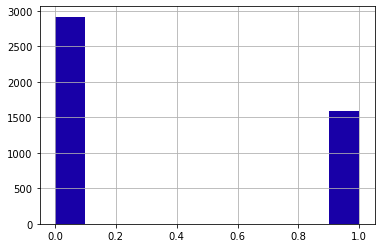

device_protection_No internet service


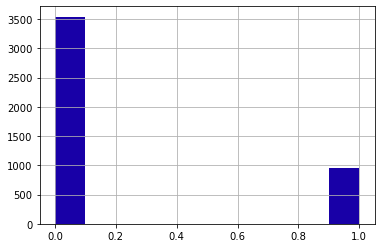

device_protection_Yes


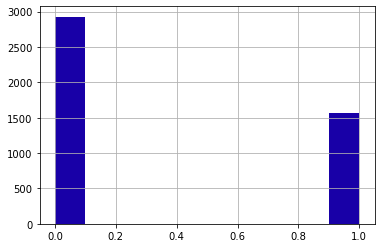

tech_support_No internet service


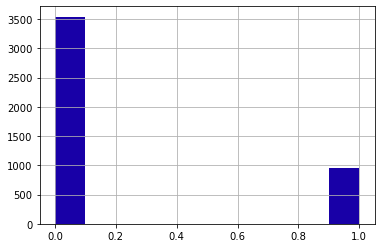

tech_support_Yes


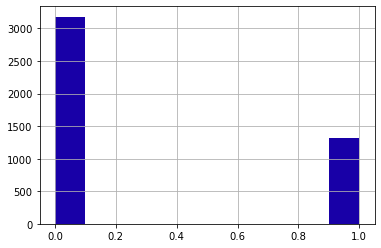

streaming_tv_No internet service


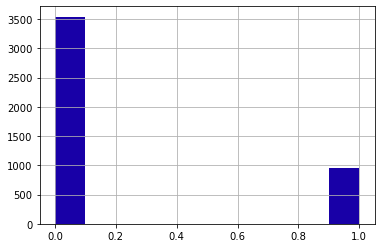

streaming_tv_Yes


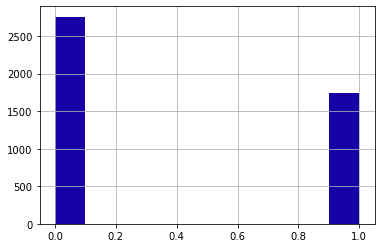

streaming_movies_No internet service


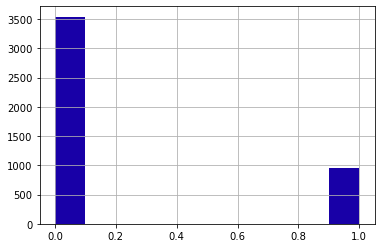

streaming_movies_Yes


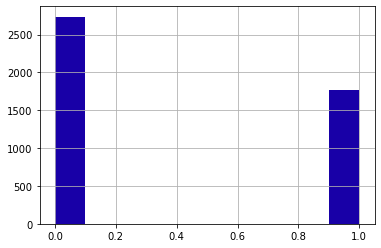

paperless_billing_Yes


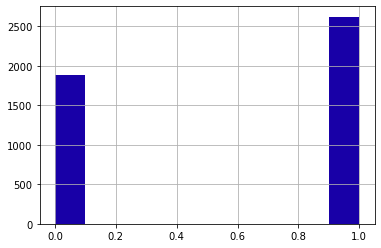

contract_type_One year


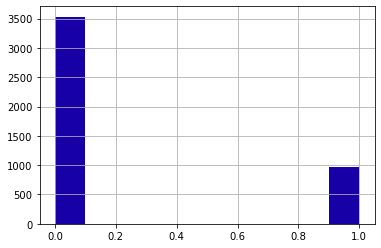

contract_type_Two year


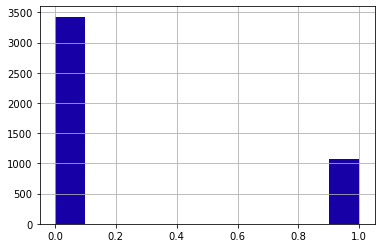

payment_type_Credit card (automatic)


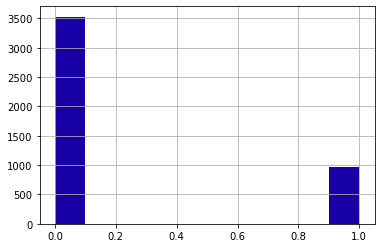

payment_type_Electronic check


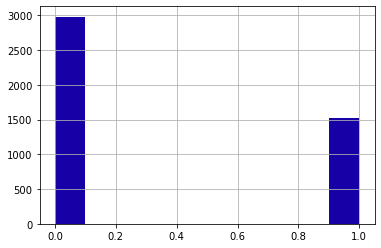

payment_type_Mailed check


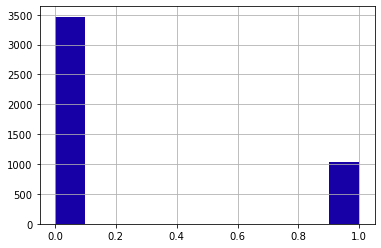

internet_service_type_Fiber optic


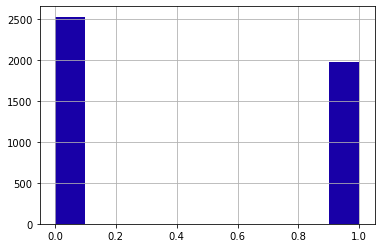

internet_service_type_None


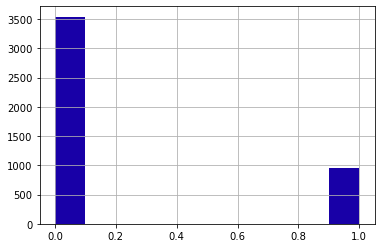

In [19]:
numcols = [col for col in train.columns if train[col].dtype != 'O']

for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

# Deeper Analysis:
- I want to check which is the best predictor of churn, and then compare the other factors to that to see if perhaps it is also driving enrollment in things like add-ons, which may mean they have *shared* causes with churn rather than causing churn themselves. 
    - I can dive into this deeper analysis later on. This will require some more complex, multivariate statistics.

# Modeling:

In [20]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'payment_type_id.1', 'payment_type', 'internet_service_type_id.1',
       'internet_service_type'],
      dtype='object')

In [21]:
train.columns.tolist()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type_id.1',
 'contract_type',
 'payment_type_id.1',
 'payment_type',
 'internet_service_type_id.1',
 'internet_service_type',
 'gender_Male',
 'senior_citizen_Yes',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 '

In [22]:
#Creating X and y model-testing dataframes:
X_train = train.drop(columns = ['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'payment_type',
'internet_service_type'])
y_train = train.churn

X_validate = validate.drop(columns = ['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'payment_type',
'internet_service_type'])
y_validate = validate.churn

X_test = test.drop(columns = ['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'payment_type',
'internet_service_type'])
y_test = test.churn

In [23]:
#Defining the baseline prediction:
train.churn.mode()
#The mode is that a customer did not churn, so our baseline guess would be that a customer will not churn. 


#Calculating the percentage of customers that churned:
train[train['churn'] == 'No'].shape[0] / train.shape[0]
#Our baseline model would be correct ~73% of the time.

0.7342222222222222

## Decision Tree:

In [24]:
#Creating the model object and fitting it to the training set:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 123)
clf = clf.fit(X_train, y_train)

[Text(362.7, 332.955, 'contract_type_id.1 <= 1.5\ngini = 0.39\nsamples = 4500\nvalue = [3304, 1196]\nclass = did not churn'),
 Text(181.35, 237.825, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.488\nsamples = 2460\nvalue = [1418, 1042]\nclass = did not churn'),
 Text(90.675, 142.695, 'tenure <= 5.5\ngini = 0.407\nsamples = 1138\nvalue = [814, 324]\nclass = did not churn'),
 Text(45.3375, 47.565, 'gini = 0.486\nsamples = 480\nvalue = [280, 200]\nclass = did not churn'),
 Text(136.0125, 47.565, 'gini = 0.306\nsamples = 658\nvalue = [534, 124]\nclass = did not churn'),
 Text(272.025, 142.695, 'tenure <= 13.5\ngini = 0.496\nsamples = 1322\nvalue = [604, 718]\nclass = churned'),
 Text(226.6875, 47.565, 'gini = 0.431\nsamples = 583\nvalue = [183, 400]\nclass = churned'),
 Text(317.3625, 47.565, 'gini = 0.49\nsamples = 739\nvalue = [421, 318]\nclass = did not churn'),
 Text(544.05, 237.825, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.14\nsamples = 2040\nvalue = [1886, 154]\ncla

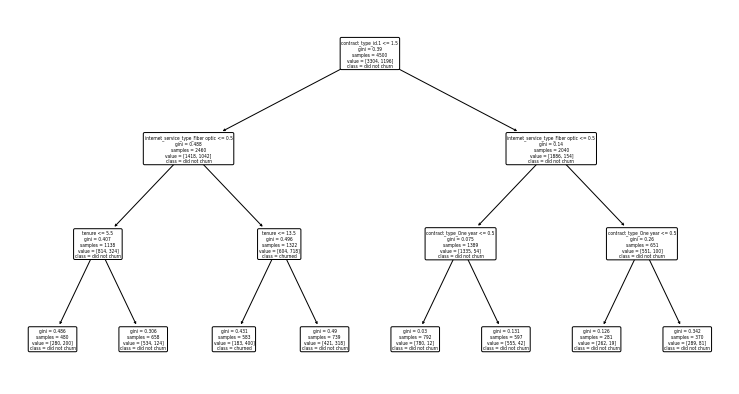

In [25]:
churned = np.array(['did not churn', 'churned'])

plt.figure(figsize = (13,7))
plot_tree(clf, feature_names = X_train.columns, class_names = churned, rounded = True)

In [26]:
# making predictions on the observations:

y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [27]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,3121,183
1,796,400


In [28]:
#Defining true/false positive and true/false negative:

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

tn, fp, fn, tp

(3121, 183, 796, 400)

In [29]:
#Accuracy:

accuracy = accuracy_score(y_train, y_pred)
accuracy

#It appears that the decision tree model is slightly better than the baseline predictor.

0.7824444444444445

In [30]:
#Finding the optimal hyperparameters for the decision tree:

for i in range(2, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.849591     0.543116  0.759556     0.696354      0.768137
recall        0.817191     0.600334  0.759556     0.708763      0.759556
f1-score      0.833076     0.570294  0.759556     0.701685      0.763235
support    3304.000000  1196.000000  0.759556  4500.000000   4500.000000

Tree with max depth of 3
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.796783     0.686106  0.782444     0.741445      0.767368
recall        0.944613     0.334448  0.782444     0.639530      0.782444
f1-score      0.864423     0.449691  0.782444     0.657057      0.754197
support    3304.000000  1196.000000  0.782444  4500.000000   4500.000000

Tree with max depth of 4
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.821853     0.623729  0.782889     0.722791      0.769196
recall        0.899213     0.461538  0.782889  

In [31]:
# Comparing in-sample to out-of-sample values:
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.759556,0.766222,-0.006667
1,3,0.782444,0.795556,-0.013111
2,4,0.782889,0.805333,-0.022444
3,5,0.794889,0.788444,0.006444
4,6,0.802444,0.790222,0.012222
5,7,0.813111,0.795556,0.017556
6,8,0.829778,0.791111,0.038667
7,9,0.849111,0.775111,0.074000
8,10,0.870667,0.773333,0.097333
9,11,0.893111,0.768889,0.124222


In [32]:
# It appears that the highest-accuracy deicison tree model on the training set has a max depth of 4.
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,4,0.782889,0.805333,-0.022444
1,3,0.782444,0.795556,-0.013111
5,7,0.813111,0.795556,0.017556
6,8,0.829778,0.791111,0.038667
4,6,0.802444,0.790222,0.012222
3,5,0.794889,0.788444,0.006444
7,9,0.849111,0.775111,0.074000
8,10,0.870667,0.773333,0.097333
0,2,0.759556,0.766222,-0.006667


In [33]:
#Graphing that model:
#Creating the model object and fitting it to the training set:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 123)
clf = clf.fit(X_train, y_train)

[Text(362.7, 342.46799999999996, 'contract_type_id.1 <= 1.5\ngini = 0.39\nsamples = 4500\nvalue = [3304, 1196]\nclass = did not churn'),
 Text(181.35, 266.364, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.488\nsamples = 2460\nvalue = [1418, 1042]\nclass = did not churn'),
 Text(90.675, 190.26, 'tenure <= 5.5\ngini = 0.407\nsamples = 1138\nvalue = [814, 324]\nclass = did not churn'),
 Text(45.3375, 114.156, 'streaming_tv_No internet service <= 0.5\ngini = 0.486\nsamples = 480\nvalue = [280, 200]\nclass = did not churn'),
 Text(22.66875, 38.051999999999964, 'gini = 0.5\nsamples = 302\nvalue = [150, 152]\nclass = churned'),
 Text(68.00625, 38.051999999999964, 'gini = 0.394\nsamples = 178\nvalue = [130, 48]\nclass = did not churn'),
 Text(136.0125, 114.156, 'phone_service_Yes <= 0.5\ngini = 0.306\nsamples = 658\nvalue = [534, 124]\nclass = did not churn'),
 Text(113.34375, 38.051999999999964, 'gini = 0.423\nsamples = 158\nvalue = [110, 48]\nclass = did not churn'),
 Text(158.68125, 

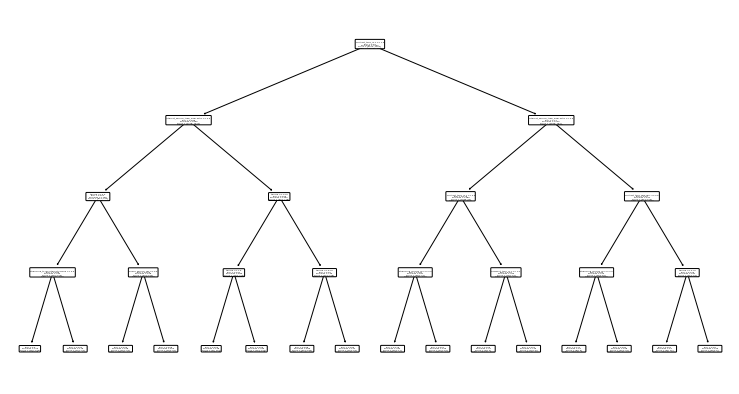

In [34]:
churned = np.array(['did not churn', 'churned'])

plt.figure(figsize = (13,7))
plot_tree(clf, feature_names = X_train.columns, class_names = churned, rounded = True)

#This isn't really visible at all.

# Random Forest Exercises:

In [35]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    No     Yes  accuracy    macro avg  weighted avg
precision     0.734222     0.0  0.734222     0.367111      0.539082
recall        1.000000     0.0  0.734222     0.500000      0.734222
f1-score      0.846745     0.0  0.734222     0.423373      0.621699
support    3304.000000  1196.0  0.734222  4500.000000   4500.000000

Tree with max depth of 3
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.777184     0.731579  0.773333     0.754382      0.765064
recall        0.969128     0.232441  0.773333     0.600785      0.773333
f1-score      0.862608     0.352792  0.773333     0.607700      0.727110
support    3304.000000  1196.000000  0.773333  4500.000000   4500.000000

Tree with max depth of 4
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.795495     0.706740  0.784667     0.751117      0.771906
recall        0.951271     0.324415  0.784667     0.637843      0.784667

In [36]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.734222,0.734222,0.000000
1,3,0.773333,0.774222,-0.000889
2,4,0.784667,0.792889,-0.008222
3,5,0.797111,0.799111,-0.002000
4,6,0.801333,0.809778,-0.008444
5,7,0.808444,0.811556,-0.003111
6,8,0.819778,0.814222,0.005556
7,9,0.834667,0.811556,0.023111
8,10,0.864000,0.812444,0.051556
9,11,0.896222,0.803556,0.092667


In [37]:
# It appears that the highest-accuracy random forest model on the training set has a max depth of 8.
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
6,8,0.819778,0.814222,0.005556
8,10,0.864000,0.812444,0.051556
5,7,0.808444,0.811556,-0.003111
7,9,0.834667,0.811556,0.023111
4,6,0.801333,0.809778,-0.008444
9,11,0.896222,0.803556,0.092667
3,5,0.797111,0.799111,-0.002000
2,4,0.784667,0.792889,-0.008222
1,3,0.773333,0.774222,-0.000889
0,2,0.734222,0.734222,0.000000


## Analyzing the best random forest model in more depth:

In [38]:
rf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 1, random_state = 123)
rf

RandomForestClassifier(max_depth=8, random_state=123)

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=123)

In [40]:
#Creating a list of the most important features.
feature_importance = {}
features = X_train.columns.tolist()
feature_importance_values = rf.feature_importances_.tolist()

feature_importance = {}
for feature in features:
    for value in feature_importance_values:
        feature_importance[feature] = value
        feature_importance_values.remove(value)
        break  
    
feature_importance

{'tenure': 0.21154113604308877,
 'contract_type_id.1': 0.16794395188483907,
 'payment_type_id.1': 0.044073998474790314,
 'internet_service_type_id.1': 0.045076886367339954,
 'gender_Male': 0.01387646405839232,
 'senior_citizen_Yes': 0.01813570154556701,
 'partner_Yes': 0.014980468467643244,
 'dependents_Yes': 0.016828805049687343,
 'phone_service_Yes': 0.005730230805451991,
 'multiple_lines_No phone service': 0.006692639959813177,
 'multiple_lines_Yes': 0.013509548080267744,
 'online_security_No internet service': 0.010441106590223166,
 'online_security_Yes': 0.036450238442087696,
 'online_backup_No internet service': 0.016590929466404312,
 'online_backup_Yes': 0.014343657545188484,
 'device_protection_No internet service': 0.011082949580507592,
 'device_protection_Yes': 0.010990215629272281,
 'tech_support_No internet service': 0.011014437202402392,
 'tech_support_Yes': 0.031295235664509806,
 'streaming_tv_No internet service': 0.00886454369051828,
 'streaming_tv_Yes': 0.0131218195123

In [41]:
#Creating a sorted list of most important features in this model:
sort_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

for i in sort_features:
    print(i[0], i[1])

tenure 0.21154113604308877
contract_type_id.1 0.16794395188483907
internet_service_type_Fiber optic 0.06579857732071041
contract_type_Two year 0.06367887000995949
internet_service_type_id.1 0.045076886367339954
payment_type_Electronic check 0.04426626524014349
payment_type_id.1 0.044073998474790314
online_security_Yes 0.036450238442087696
tech_support_Yes 0.031295235664509806
paperless_billing_Yes 0.025967319784510265
contract_type_One year 0.0209010628750048
senior_citizen_Yes 0.01813570154556701
dependents_Yes 0.016828805049687343
streaming_movies_No internet service 0.016797586923647568
online_backup_No internet service 0.016590929466404312
streaming_movies_Yes 0.015176568118868857
partner_Yes 0.014980468467643244
online_backup_Yes 0.014343657545188484
gender_Male 0.01387646405839232
multiple_lines_Yes 0.013509548080267744
streaming_tv_Yes 0.013121819512398627
device_protection_No internet service 0.011082949580507592
internet_service_type_None 0.011016603693174875
tech_support_No i

# KNN Model

In [42]:
#Creating the (empty) model object:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Fitting the model to training data:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
#Classifying each passenger by whether they are expected to survive:
y_pred = knn.predict(X_train)
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [44]:
# Viewing probability of survival or death, for each passenger in the training set:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6]])

In [45]:
#83 percent accuracy for 5 nearest neighbors is actually pretty good:
accuracy_score(y_train, y_pred)

0.8266666666666667

In [46]:
# Model Score:

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [47]:
print(confusion_matrix(y_train, y_pred))

[[3004  300]
 [ 480  716]]


In [48]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TN, FP, FN, TP 

(3004, 300, 480, 716)

In [49]:
def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [50]:
show_scores(TN, FP, FN, TP)

Accuracy: 0.8266666666666667
Precision: 0.7047244094488189
Recall: 0.5986622073578596
True Positive Rate: 0.5986622073578596
True Negative Rate: 0.9092009685230025
False Positive Rate: 0.09079903147699758
False Negative Rate: 0.4013377926421405
F1 Score: 0.6473779385171791
Support (0): 1196
Support (1): 3304


In [51]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)
results['difference'] = df.train_accuracy - df.validate_accuracy
results

,k,train_accuracy,validate_accuracy,difference
0,1,0.977333,0.726222,0.000000
1,2,0.858889,0.763556,-0.000889
2,3,0.851778,0.766222,-0.008222
3,4,0.832444,0.783111,-0.002000
4,5,0.826667,0.783111,-0.008444
5,6,0.819556,0.789333,-0.003111
6,7,0.814667,0.790222,0.005556
7,8,0.812444,0.799111,0.023111
8,9,0.811333,0.797333,0.051556
9,10,0.809778,0.794667,0.092667


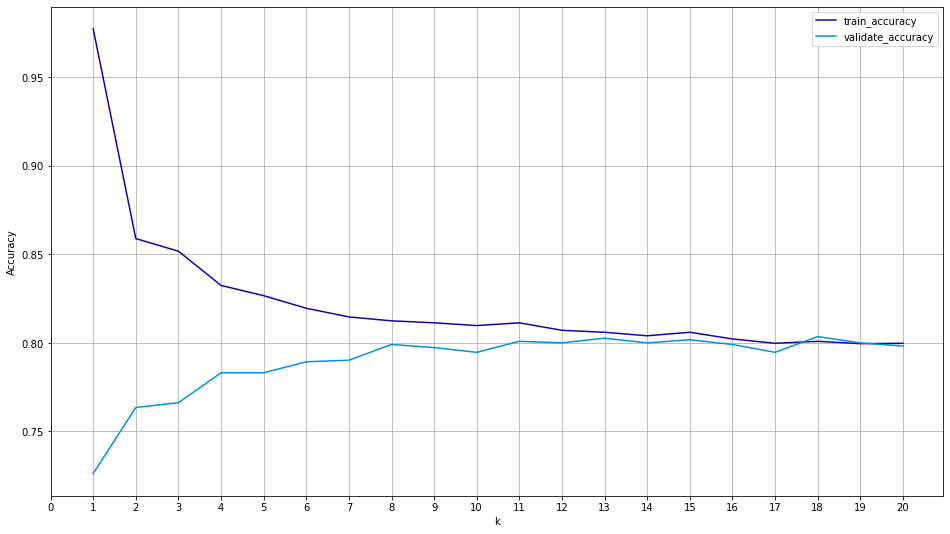

In [52]:
# plot the data
results.drop(columns = 'difference').set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [53]:
results[results.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

#It looks like the model where k = 7 is the best model by a bit, with 1/4 the difference between train and validate

,k,train_accuracy,validate_accuracy,difference
7,8,0.812444,0.799111,0.023111
8,9,0.811333,0.797333,0.051556
9,10,0.809778,0.794667,0.092667
6,7,0.814667,0.790222,0.005556
5,6,0.819556,0.789333,-0.003111
4,5,0.826667,0.783111,-0.008444
3,4,0.832444,0.783111,-0.002000
2,3,0.851778,0.766222,-0.008222
1,2,0.858889,0.763556,-0.000889
0,1,0.977333,0.726222,0.000000


In [54]:
# Running the model with the ideal parameters:
#Creating the (empty) model object:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')

#Fitting the model to training data:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [55]:
#Classifying each customer by whether they are expected to churn:
y_pred = knn.predict(X_train)
y_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

# Regression Model:

In [56]:
logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs')

In [57]:
logit.fit(X_train, y_train)
LogisticRegression(C=1, random_state=123)

LogisticRegression(C=1, random_state=123)

In [58]:
#Determine importance of each of the features:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.03051855 -0.56620204 -0.07764629  0.29272268 -0.03297689  0.29715123
   0.02308288 -0.21801525 -0.26500569  0.31597165  0.17157668 -0.19569105
  -0.41909308 -0.19569105 -0.12163098 -0.19569105 -0.04851001 -0.19569105
  -0.35352184 -0.19569105  0.23202842 -0.19569105  0.38211671  0.3713682
  -0.04120491 -0.28798154 -0.07770633  0.09626593 -0.03969401  0.63313881
  -0.19569105]]
Intercept: 
 [0.05475072]


In [59]:
coefficients = []

for i in logit.coef_[0]:
    coefficients.append(i)

coefficients

[-0.030518553785758563,
 -0.5662020353757655,
 -0.07764629293310792,
 0.29272267545404235,
 -0.03297689034381973,
 0.297151231735151,
 0.023082875720979515,
 -0.21801525275163197,
 -0.26500568523612744,
 0.31597164659926164,
 0.1715766781714781,
 -0.19569104813381827,
 -0.41909308155543207,
 -0.19569104813381827,
 -0.12163098351193573,
 -0.19569104813381827,
 -0.04851000967266464,
 -0.19569104813381827,
 -0.35352183750293026,
 -0.19569104813381827,
 0.23202842044984712,
 -0.19569104813381827,
 0.38211671368111266,
 0.3713681971222205,
 -0.041204913454831196,
 -0.28798154164203404,
 -0.0777063259490993,
 0.09626592855235934,
 -0.03969400603126855,
 0.6331388103585188,
 -0.19569104813381827]

In [60]:
#Creating a list of the most important features.
regression_feature_importance = {}
features = X_train.columns.tolist()
feature_importance_values = coefficients

regression_feature_importance = {}
for feature in features:
    for value in feature_importance_values:
        regression_feature_importance[feature] = value
        feature_importance_values.remove(value)
        break  
    
regression_feature_importance

{'tenure': -0.030518553785758563,
 'contract_type_id.1': -0.5662020353757655,
 'payment_type_id.1': -0.07764629293310792,
 'internet_service_type_id.1': 0.29272267545404235,
 'gender_Male': -0.03297689034381973,
 'senior_citizen_Yes': 0.297151231735151,
 'partner_Yes': 0.023082875720979515,
 'dependents_Yes': -0.21801525275163197,
 'phone_service_Yes': -0.26500568523612744,
 'multiple_lines_No phone service': 0.31597164659926164,
 'multiple_lines_Yes': 0.1715766781714781,
 'online_security_No internet service': -0.19569104813381827,
 'online_security_Yes': -0.41909308155543207,
 'online_backup_No internet service': -0.19569104813381827,
 'online_backup_Yes': -0.12163098351193573,
 'device_protection_No internet service': -0.19569104813381827,
 'device_protection_Yes': -0.04851000967266464,
 'tech_support_No internet service': -0.19569104813381827,
 'tech_support_Yes': -0.35352183750293026,
 'streaming_tv_No internet service': -0.19569104813381827,
 'streaming_tv_Yes': 0.232028420449847